In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset


C:\Users\roger\AppData\Local\Temp\ipykernel_9912\2816518301.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
import seaborn as sns
import torch

# Iris ডেটাসেট লোড করো
iris = sns.load_dataset('iris')

In [4]:
import seaborn as sns
import torch

# Iris ডেটাসেট লোড করো
iris = sns.load_dataset('iris')

# Features (4টি) কে float32 tensor বানাও
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# Labels তৈরি করো (0,1,2) অনুযায়ী
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2


### Break The data into batches

In [5]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Split data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

# ✅ labels must be LongTensor (for classification)
train_dataset = TensorDataset(torch.tensor(train_data, dtype=torch.float32),
                              torch.tensor(train_labels, dtype=torch.long))

test_dataset = TensorDataset(torch.tensor(test_data, dtype=torch.float32),
                             torch.tensor(test_labels, dtype=torch.long))

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))  # full batch for test


C:\Users\roger\AppData\Local\Temp\ipykernel_9912\2468796170.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(train_data, dtype=torch.float32),
C:\Users\roger\AppData\Local\Temp\ipykernel_9912\2468796170.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(train_labels, dtype=torch.long))
C:\Users\roger\AppData\Local\Temp\ipykernel_9912\2468796170.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = TensorDataset(torch.tensor(test_data, dtype=torch.float32),
C:\Users\

In [7]:
import torch
import torch.nn as nn

def createANewModel(L2lambda):
    # Model
    ANNiris = nn.Sequential(
        nn.Linear(4, 64),
        nn.ReLU(),
        nn.Linear(64, 64),
        nn.ReLU(),
        nn.Linear(64, 3)
    )
    
    # Loss function
    lossfun = nn.CrossEntropyLoss()

    # Optimizer with L2 regularization (weight_decay)
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.005, weight_decay=L2lambda)

    return ANNiris, lossfun, optimizer


In [8]:
numepochs = 1000

def trainTheModel():
    trainAcc = []
    testAcc = []
    losses = []

    for epochi in range(numepochs):
        batchAcc = []
        batchLoss = []

        # Training mode
        ANNQC.train()

        for X, y in train_loader:
            ## Forward pass and loss
            yHat = ANNQC(X)
            loss = lossfun(yHat, y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accuracy
            preds = torch.argmax(yHat, dim=1)
            acc = 100 * torch.mean((preds == y).float()).item()
            batchAcc.append(acc)
            batchLoss.append(loss.item())

        # Epoch metrics
        trainAcc.append(np.mean(batchAcc))
        losses.append(np.mean(batchLoss))

        # Optional: Test accuracy evaluation per epoch
        ANNQC.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for X, y in test_loader:
                yHat = ANNQC(X)
                preds = torch.argmax(yHat, dim=1)
                correct += (preds == y).sum().item()
                total += y.size(0)
        testAcc.append(100 * correct / total)

        # Optional: Print progress
        if epochi % 100 == 0:
            print(f"Epoch {epochi}: Train Acc = {trainAcc[-1]:.2f}%, Test Acc = {testAcc[-1]:.2f}%, Loss = {losses[-1]:.4f}")

    return trainAcc, testAcc, losses


In [10]:
L2lambda=.01
ANNQC,lossfun,optimizer=createANewModel(L2lambda=.01)

trainAcc, testAcc ,losses= trainTheModel()


Epoch 0: Train Acc = 36.72%, Test Acc = 33.33%, Loss = 1.0456
Epoch 100: Train Acc = 95.31%, Test Acc = 93.33%, Loss = 0.2837
Epoch 200: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.1326
Epoch 300: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.1216
Epoch 400: Train Acc = 96.88%, Test Acc = 96.67%, Loss = 0.0909
Epoch 500: Train Acc = 98.44%, Test Acc = 96.67%, Loss = 0.0864
Epoch 600: Train Acc = 99.22%, Test Acc = 96.67%, Loss = 0.0849
Epoch 700: Train Acc = 98.44%, Test Acc = 96.67%, Loss = 0.0819
Epoch 800: Train Acc = 98.44%, Test Acc = 96.67%, Loss = 0.0796
Epoch 900: Train Acc = 99.22%, Test Acc = 96.67%, Loss = 0.0732


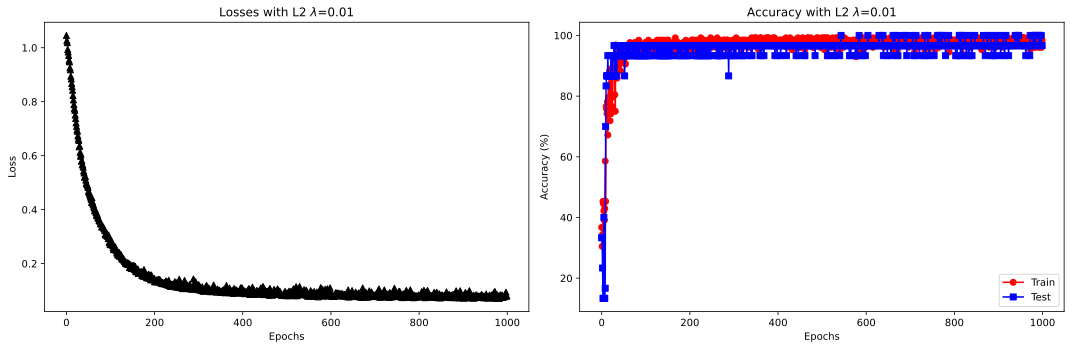

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss
ax[0].plot(losses, 'k^-')
ax[0].set_xlabel('Epochs')  # Corrected label
ax[0].set_ylabel('Loss')
ax[0].set_title('Losses with L2 $\lambda$=' + str(L2lambda))  # Fixed typo

# Plot accuracy
ax[1].plot(trainAcc, 'ro-')
ax[1].plot(testAcc, 'bs-')
ax[1].set_title('Accuracy with L2 $\lambda$=' + str(L2lambda))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train', 'Test'])

plt.tight_layout()
plt.show()


In [13]:
def smooth(x,k=5):
    return np.convolve(x,np.ones(k)/k,mode='same')

In [14]:
l2lambdas=np.linspace(0,.1,10)

accuracyResultTrain=np.zeros((numepochs,len(l2lambdas)))
accuracyResultTest=np.zeros((numepochs,len(l2lambdas)))

for li in range(len(l2lambdas)):
    ANNiris,lossfun,optimizer=createANewModel(l2lambdas[li])
    trainAcc,testAcc,losses=trainTheModel()

    accuracyResultTrain[:,li]=smooth(trainAcc,10)
    accuracyResultTest[:,li]=smooth(testAcc,10)

Epoch 0: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0733
Epoch 100: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0763
Epoch 200: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0734
Epoch 300: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0772
Epoch 400: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0723
Epoch 500: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0739
Epoch 600: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0728
Epoch 700: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0725
Epoch 800: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0723
Epoch 900: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0724
Epoch 0: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0721
Epoch 100: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0720
Epoch 200: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0757
Epoch 300: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0734
Epoch 400: Train Acc = 97.66%, Test Acc = 96.67%, Loss = 0.0729
Epoch 500: Train Acc = 97.66%, Test Acc = 96

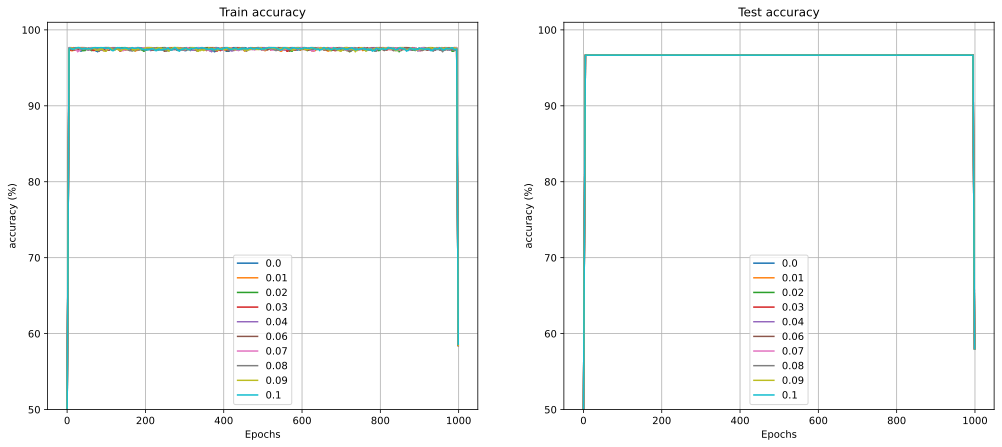

In [15]:
fig,ax=plt.subplots(1,2,figsize=(17,7))

ax[0].plot(accuracyResultTrain)
ax[0].set_title('Train accuracy')
ax[1].plot(accuracyResultTest)
ax[1].set_title('Test accuracy')


leglables=[np.round(i,2) for i in l2lambdas]

for i in range(2):
    ax[i].legend(leglables)
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('accuracy (%)')
    ax[i].set_ylim([50,101])
    ax[i].grid()

plt.show()

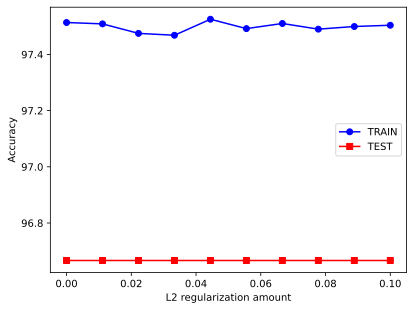

In [16]:
epoch_range=[500,950]

plt.plot(l2lambdas,
         np.mean(accuracyResultTrain[epoch_range[0]:epoch_range[1],:],axis=0),
         'bo-',label='TRAIN'
         )


plt.plot(l2lambdas,
         np.mean(accuracyResultTest[epoch_range[0]:epoch_range[1],:],axis=0),
         'rs-',label='TEST'
         )

plt.xlabel('L2 regularization amount')
plt.ylabel('Accuracy')
plt.legend()
plt.show()